In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
df = pd.read_csv('Tweets.csv')
df.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [8]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(lambda x: clean_text(str(x)))

In [9]:
analyzer = SentimentIntensityAnalyzer()
df['vader_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment_vader'] = df['vader_score'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4668\3977345486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=df, palette='coolwarm')


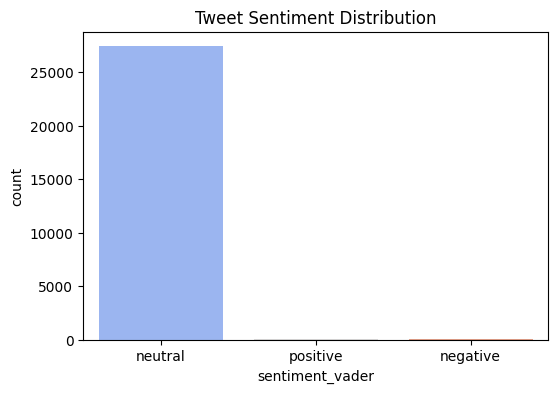

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_vader', data=df, palette='coolwarm')
plt.title('Tweet Sentiment Distribution')
plt.show()

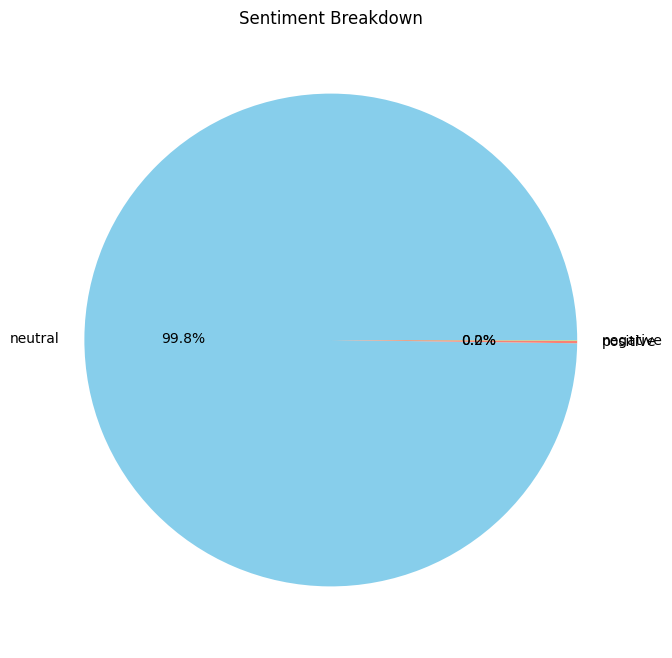

In [13]:
plt.figure(figsize=(8,8))
df['sentiment_vader'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Breakdown')
plt.ylabel('')
plt.show()

In [14]:
df[df['sentiment_vader']=='positive']['clean_text'].head(5)
df[df['sentiment_vader']=='negative']['clean_text'].head(5)


329        sucks
2761       bored
6431     annoyed
10474       rude
11007       lame
Name: clean_text, dtype: object